# CH273: Python Refresher
In this Notebook we are going to revise a few basics of Python, and how we can use Jupyter Notebooks to see StatMech at work.

<div class="alert alert-block alert-info">
    
These blue boxes contain instructions for you to follow, or stuff for you to do
<h2>How to access this Jupyter notebook</h2>

* <b>Step 1</b>: Open a web browser,  and go to [this page](https://jupyter.warwick.ac.uk/) 
* <b>Step 2</b>: Select CH273 from the Module menu
* <b>Step 3</b>: Enter your SCRTP username and password and press the "Start Server" button.<br>
* <b>Step 4</b>: Wait (it could take a few minutes) until the blue blox says "Jupyter notebook server running!". At that point, click on the weblink below said message.<br>
* <b>Step 5</b>: Select the Jupyter Notebook you want to work on. Remember to make a copy of the orginal notebook (which is read only). To do so, in the toolbar on top of the notebook, select File and then Make a Copy <br>
* <b>Step 6</b>: You're all set! <br>
* <b>Step 7</b>: <font color="red">When you are done, remember to click the "Stop Server" button in the launcher web browser tab.</font> Please do, it's really quite important. <br>
<b> Remember: </b> You can access your copy of the Notebook at any time from any device off and on campus by going through the same steps on e.g. your laptop - all the changes you have made will be saved and synced! <br>

<div/>

In [92]:
# Import a number is useful packages...
import numpy as np
import matplotlib.pyplot as plt

### Variables, lists and arrays

In [93]:
# Assign a value to a variable, e.g. the Boltzmann constant in units of [ev*K^{-1}]
kb = 8.617333262145e-5 # using scientific notation, i.e. e-5 = *10^{-5}

# Print the value of this variable
print(kb)

8.617333262145e-05


In [94]:
# Lists can contain anything: numbers, strings, objects, etc.
# (numpy) arrays are designed to work with numbers specifically

# Build a numpy array with 1000 elements (indexes from 0 to 999, remember: Python starts counting from zero!)
# Each element is a random number between -6.3 and -5.8
energy = np.random.uniform(low=-6.3, high=-5.8, size=(1000,))

# We will assume this "energy" array contains the energy (in eV) of 1000, statistically independent configurations 
# of liquid water, sampled within the microcanonical ensemble NVE

### Loops - ensemble averages
Let's say we want to calculate the ensemble average of the energy, using the data we have just generated in conjunction with the hopefully familiar formula:

$$
E_{Macro}= \langle E \rangle = \frac{1}{N}\sum_{i=1}^{N=1000} E_i
$$

Using a loop is a not bad way of doing this...

In [95]:
# Anytime we are dealing with a summation we should probably initialise the value of said summation to zero,
# so that we can increase the value of it at each loop iteration
summ = 0

# Method n.1 - loop through the elements of the array directly
for i in energy:
    summ = summ + i

# Method n.2 - loop from 0 t0 1000 inclusive and reference the corresponding array index
summ = 0
for i in range (0,1000): # or... for i in range (0,len(energy))
    summ = summ + energy[i]
    
# Divide by the number of configurations, i.e. the length of the array
summ = summ / len(energy)

# Storing this result for later use...
e_ave = summ

# Print the ensemble average
print(e_ave)

-6.042430980047348


No-loop, one-liner solution for the pros...

In [96]:
print(np.sum(energy)/len(energy))

-6.042430980047343


Lazier and lazier...

In [100]:
np.average(energy)

-6.042430980047343

### Plotting - fluctuations, convergence and errors
We have discussed in the lectures that in the NVE ensemble the energy is *conserved*, meaning that the instantaneous value of the energy fluctuates in time (if we are looking at the time evolution of a given system). Or, equivalently, that different configurations of the system will all have sligthly different energies, but the average should stay constant, without "drifting" away. Let's see whether this is the case for the data that we have generated above...

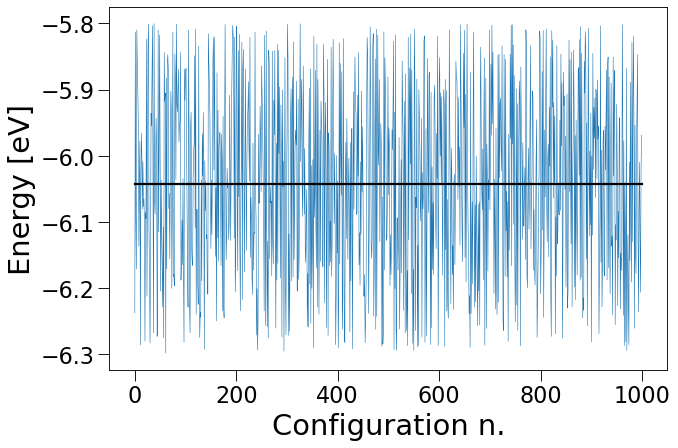

In [97]:
# Generic settings for a nice plot. Tweak according to your taste
plt.figure(figsize=(9, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both', which='both', length=10.0, labelleft=True, labelbottom=True, labelsize=20.0)

# Plot the energy values
plt.plot(energy, linewidth=0.5)

# Plot a straight line corresponding to the ensemble average we have computed above
plt.plot([0,len(energy)], [e_ave,e_ave], 'k-', lw=2)

plt.xlabel('Configuration n.', fontsize=26)
plt.ylabel('Energy [eV]', fontsize=26)
plt.show()

As an interesting experiment, we could also look at the value of the ensemble average *as a function of how many configuration we are considering*. To do so, instead of initialising a single variable `summ`, we need to initalise an array...

In [98]:
# Build an array containing 1000 elements, all of them equal to zero
s_array = np.zeros(len(energy))
summ = 0

# Intialise a "counter", that is, a variable that keeps track of which configuration we are sampling
c = 0

# Fill the i-th element of this array with the value of the ensemble average obtained 
# by considering all the energy up to the i-th element
for i in range (0,len(energy)):
    c = c + 1
    summ = summ + energy[i]
    s_array[i] = summ / c # we divide by the number of configurations considered up to this point

Let's have a look, shall we?

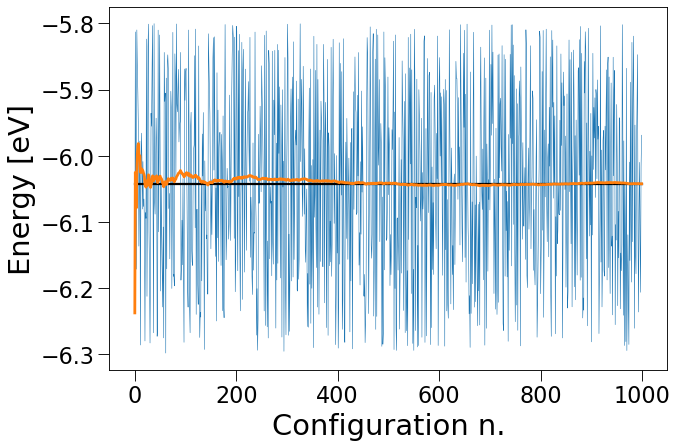

In [99]:
# Generic settings for a nice plot. Tweak according to your taste
plt.figure(figsize=(9, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both', which='both', length=10.0, labelleft=True, labelbottom=True, labelsize=20.0)

# # Plot the energy values
plt.plot(energy, linewidth=0.5)

# # Plot a straight line corresponding to the ensemble average we have computed above
plt.plot([0,len(energy)], [e_ave,e_ave], 'k-', lw=2)

# Plot the ensemble average computed by conidering up to the i-th configuration
plt.plot(s_array, linewidth=2.5)

plt.xlabel('Configuration n.', fontsize=26)
plt.ylabel('Energy [eV]', fontsize=26)
plt.show()

<div class="alert alert-block alert-info">
    
<h2>Task 1</h2>

Calculate, in the same fashion as what we have done for `s_array` the uncertainty (you can use the standard deviatiob or other indicators of your choosing) associated with the value of the ensemble average computed up to the i-th configuration. Plot the result

<div/>

In [86]:
e_array = np.zeros(len(energy))

for i in range (0,len(energy)):
    e_array[i] = np.std(energy[0:i], axis=0)

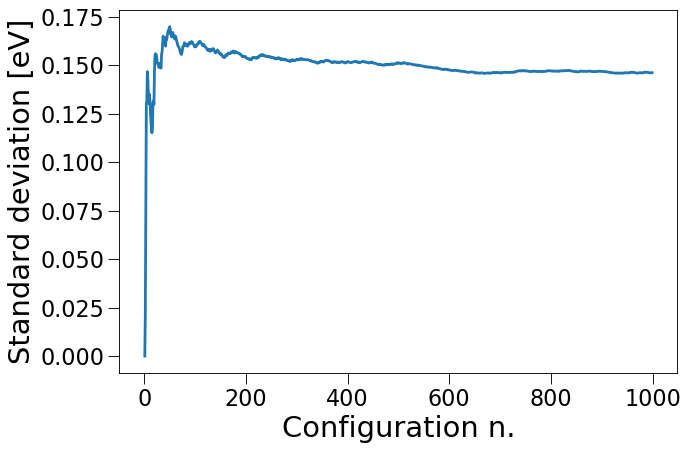

In [91]:
# Generic settings for a nice plot. Tweak according to your taste
plt.figure(figsize=(9, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both', which='both', length=10.0, labelleft=True, labelbottom=True, labelsize=20.0)

plt.plot(e_array, linewidth=2.5)

plt.xlabel('Configuration n.', fontsize=26)
plt.ylabel('Standard deviation [eV]', fontsize=26)
plt.show()

### Functions
Would it not be great if we could just call a function that return the ensemble average as well as the extent of the fluctuations (quantified as the standard deviation of the data)? No problem...

In [103]:
def e_ave_std(x):
    en_ave = np.average(x)
    std_ave = np.std(x, axis=0)
    return en_ave, std_ave

In [104]:
e_ave, s_ave = e_ave_std(energy)
print("The ensemble average is", e_ave, " eV")
print("The extent of the enrgy fluctuations is", s_ave, " eV")

The ensemble average is -6.042430980047343  eV
The extent of the enrgy fluctuations is 0.14121482606051614  eV


<div class="alert alert-block alert-info">
    
<h2>Task 2</h2>

* Plot the histogram of the energy data we have been using
* Plot the probability density function of the energy data we have been using
* Comment on the difference between the two...

<div/>

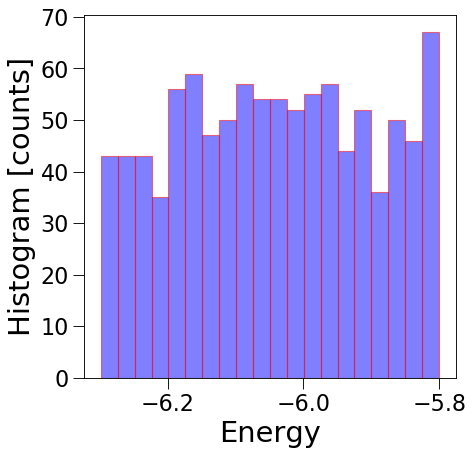

In [117]:
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both', which='both', length=10.0, labelleft=True, labelbottom=True, labelsize=20.0)
plt.hist(energy, color = 'blue', edgecolor = 'red', bins = 20, alpha = 0.5)
plt.xlabel('Energy', fontsize=26)
plt.ylabel('Histogram [counts]', fontsize=26)
plt.show()

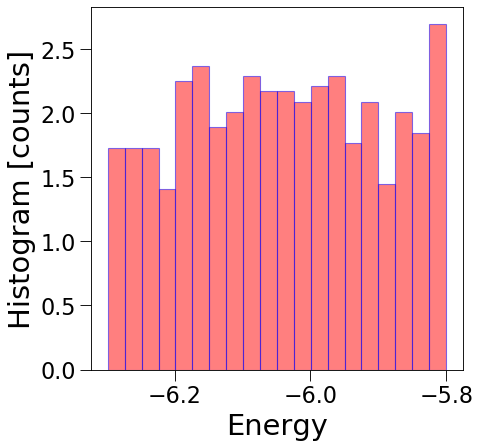

In [118]:
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both', which='both', length=10.0, labelleft=True, labelbottom=True, labelsize=20.0)
plt.hist(energy, color = 'red', edgecolor = 'blue', bins = 20, density='True', alpha = 0.5)
plt.xlabel('Energy', fontsize=26)
plt.ylabel('Histogram [counts]', fontsize=26)
plt.show()